In [2]:
import pandas as pd
from pathlib import Path
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize
import re
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
from nltk import ngrams

#### Dataset construction

In [3]:
# Parent directories, 'orginal' stores the original chapters translated by machine or by different translators; 
#                     'cleaned' stores the cleaned files by data pre-processing
ORIGINAL_DIR = Path('original')
CLEANED_DIR = Path('cleaned')

# Chuildren directories for each parent dir
PO_GOO_DIR = Path('po-en-goo') # stores chapters translated by Google Translate from the original version (Polish) of the book Solaris to English
PO_DL_DIR = Path('po-en-dl') # stores chapters translated by DeepL API from the original version (Polish) of the book Solaris to English
FR_GOO_DIR = Path('fr-en-goo') # stores chapters translated by Google Translate from the translated french version of the book Solaris to English
FR_DL_DIR = Path('fr-en-dl') # stores chapters translated by DeepL API from the translated french version of the book Solaris to English
EN1_DIR = Path('en1') # stores chapters of first translated version to English of the book Solaris
EN2_DIR = Path('en2') # stores chapters of second translated version to English of the book Solaris

# List to access children directories
DIRS = [PO_GOO_DIR, PO_DL_DIR, FR_GOO_DIR, FR_DL_DIR, EN1_DIR, EN2_DIR]

# List for all the translations
BOOKS = ['po-en-goo', 'po-en-dl', 'fr-en-goo', 'fr-en-dl', 'en1', 'en2']

In [21]:
# a set of all the vocabularies in all documents
all_bigrams = set()
# txt a list, each element is a string of the sigle chapter
txt = []

vectorizer = CountVectorizer(ngram_range =(2, 2))

for i in DIRS:
    for j in (CLEANED_DIR / i).iterdir():
        with open(j, "r") as f:
            chp = f.read()
            txt.append(chp)

# vectorise the whole corpus, by chapter
bigrams = vectorizer.fit_transform(txt) 
all_bigrams = all_bigrams.union(set(vectorizer.get_feature_names_out()))
        
all_bigrams_len = len(all_bigrams) 
bigrams.toarray().sum(axis=1)

array([3318, 2999, 4501, 2324, 8313, 3455, 5300, 4444, 2294, 4395, 6853,
       4680, 3448, 5605, 3588, 3148, 4797, 2495, 8919, 3678, 5653, 4801,
       2451, 4819, 7441, 4961, 3594, 6127, 4671, 4279, 5527, 3367, 7016,
       2369, 8657, 3532, 2260, 4461, 4664, 3477, 5891, 3109, 4727, 4364,
       5512, 3361, 7100, 2379, 8658, 3541, 2263, 4526, 4644, 3477, 5930,
       3098, 5791, 2283, 2281, 4394, 4576, 4442, 7280, 3178, 3313, 3306,
       3340, 8180, 5667, 4587, 7585, 4956, 5043, 2612, 5940, 3252, 3857,
       9325, 6467, 2473, 5175, 4961, 3867, 5043])

In [20]:
# Get the TF-IDF for each chapter
vectorizer = TfidfVectorizer(ngram_range = (2, 2), norm='l1')
tfidf = vectorizer.fit_transform(txt)
scores = tfidf.toarray()
tfi_df = pd.DataFrame(scores, columns=vectorizer.get_feature_names_out(), index=[f"{b}-{i}" for b in BOOKS for i in range(1,15)])

# Check the normalisation
# tfi_df.sum(axis=1)

po-en-goo-1    1.0
po-en-goo-2    1.0
po-en-goo-3    1.0
po-en-goo-4    1.0
po-en-goo-5    1.0
              ... 
en2-10         1.0
en2-11         1.0
en2-12         1.0
en2-13         1.0
en2-14         1.0
Length: 84, dtype: float64

In [22]:
tfi_df

,00 fog,00 hours,00 to,000 metres,000 or,000 stopped,000 years,07 00,10 19,10 ergs,...,zone where,zones of,zoo degenerative,zoom lever,zoomed in,zoomorphism constantly,zoomorphism saw,zoomorphism there,zoomorphism which,zoosperm or
po-en-goo-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
po-en-goo-2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
po-en-goo-3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
po-en-goo-4,0.0,0.0,0.0,0.0,0.0,0.000641,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
po-en-goo-5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
en2-10,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
en2-11,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
en2-12,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
en2-13,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# Build a df-idf for each book dataframe
chp_df = tfi_df.T
chp_df['po-en-goo'] = chp_df.loc[:,chp_df.columns.str.startswith('po-en-goo-')].sum(axis=1)
chp_df['po-en-dl'] = chp_df.loc[:,chp_df.columns.str.startswith('po-en-dl-')].sum(axis=1)
chp_df['fr-en-goo'] = chp_df.loc[:,chp_df.columns.str.startswith('fr-en-goo-')].sum(axis=1)
chp_df['fr-en-dl'] = chp_df.loc[:,chp_df.columns.str.startswith('fr-en-dl-')].sum(axis=1)
chp_df['en1'] = chp_df.loc[:,chp_df.columns.str.startswith('en1-')].sum(axis=1)
chp_df['en2'] = chp_df.loc[:,chp_df.columns.str.startswith('en2-')].sum(axis=1)
chp_df = chp_df/14

doc_df = chp_df.iloc[:, -6:]
# Normalisation check
# doc_df.sum(axis=0)

# Transpose fit pca input type
chp_df = chp_df.T
doc_df = doc_df.T

In [42]:
# Pick out the top 200 most frequent bigrams (exclude any proper nouns) 
top200 = tfi_df.sum(axis=0).sort_values(ascending=[False]).head(200)
top200 = list(top200.index)
# doc_df.sum(axis=0)
top200

,00 fog,00 hours,00 to,000 metres,000 or,000 stopped,000 years,07 00,10 19,10 ergs,...,zone where,zones of,zoo degenerative,zoom lever,zoomed in,zoomorphism constantly,zoomorphism saw,zoomorphism there,zoomorphism which,zoosperm or
po-en-goo,0.000013,0.000000,0.000000,0.000000,0.000000,0.000046,0.000000,0.000000,0.000000,0.000000,...,0.000016,0.000014,0.000000,0.000024,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
po-en-dl,0.000012,0.000000,0.000000,0.000000,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000015,0.000013,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000011,0.000000
fr-en-goo,0.000000,0.000000,0.000015,0.000000,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000010,0.000000,0.000000,0.000041
fr-en-dl,0.000000,0.000000,0.000000,0.000000,0.000013,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000011,0.000000,0.000000,0.000041
en1,0.000000,0.000079,0.000000,0.000017,0.000000,0.000000,0.000017,0.000017,0.000012,0.000012,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000012,0.000000,0.000000
en2,0.000011,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000014,0.000000,0.000015,0.000000,0.00002,0.00001,0.000000,0.000000,0.000000,0.000000


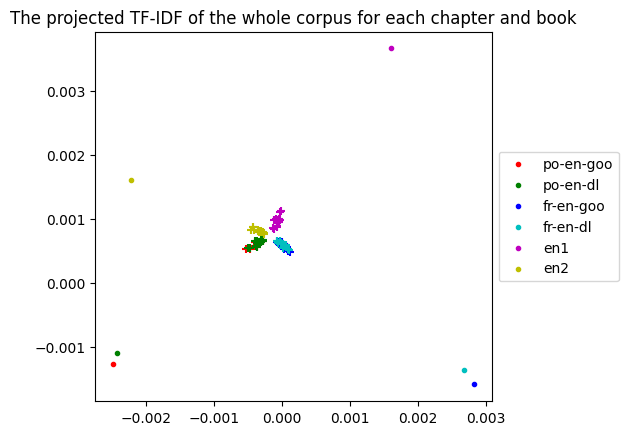

In [45]:
'''Plotting the pca features for each chapter and each book'''
# Applies principal component analysis
pca = PCA(n_components=2)
pca_doc = pca.fit_transform(doc_df)
pca_chp = pca.transform(chp_df)

# COLOUR_MAP = "tab10"
# CMAP = plt.get_cmap(COLOUR_MAP)
# rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

# colours = [CMAP(i) for i in rescale(np.arange(6))]
colours = ['r','g','b','c','m','y']
# plt.style.use('ggplot')
ax = plt.subplot(111)
for i in range(6):
    ax.scatter(pca_doc[i,0], pca_doc[i,1], color=colours[i], marker='.', label=BOOKS[i])
    ax.scatter(pca_chp[14*i:14*(i+1),0], pca_chp[14*i:14*(i+1),1], color=colours[i], marker='+')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.set_title('The projected TF-IDF of the whole corpus for each chapter and book')
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig(Path('unigram-graph') / "all.png")
plt.show()

,po-en-goo-1,po-en-goo-2,po-en-goo-3,po-en-goo-4,po-en-goo-5,po-en-goo-6,po-en-goo-7,po-en-goo-8,po-en-goo-9,po-en-goo-10,...,en2-11,en2-12,en2-13,en2-14,po-en-goo,po-en-dl,fr-en-goo,fr-en-dl,en1,en2
00 fog,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000013,0.000012,0.000000,0.000000,0.000000,0.000011
00 hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000079,0.000000
00 to,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000015,0.000000,0.000000,0.000000
000 metres,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000017,0.000000
000 or,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000012,0.000012,0.000013,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoomorphism constantly,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000010
zoomorphism saw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000010,0.000011,0.000000,0.000000
zoomorphism there,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000012,0.000000
zoomorphism which,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000011,0.000000,0.000000,0.000000,0.000000
